# The zip function:

generates tuples of its agrguments sequentially. Each element is each of the elements of the list together. That would be that the first one is mapped to the firts one of the second list, and the first one of the third list...

In [1]:
names = ['a','b','c']
ages  = [21,30,45]
favourite_colours = ['Pink','Gray','Blue']
print(list(zip(names,ages,favourite_colours)))
for name,age,colour in zip(names,ages,favourite_colours):
    print(name,age,colour)
asdf = list(zip(names,ages,favourite_colours))
print(asdf[1:])

[('a', 21, 'Pink'), ('b', 30, 'Gray'), ('c', 45, 'Blue')]
a 21 Pink
b 30 Gray
c 45 Blue
[('b', 30, 'Gray'), ('c', 45, 'Blue')]


In [2]:
from datetime import datetime
num_of_days = 10
years = [2009] *num_of_days
months= [12]   *num_of_days
days  = list(range(1,11))

times = [datetime(year,month,day)
         for year,month,day
         in zip(years,months,days)]
for time in times:
    print(time.isoformat())
print(len(times))

2009-12-01T00:00:00
2009-12-02T00:00:00
2009-12-03T00:00:00
2009-12-04T00:00:00
2009-12-05T00:00:00
2009-12-06T00:00:00
2009-12-07T00:00:00
2009-12-08T00:00:00
2009-12-09T00:00:00
2009-12-10T00:00:00
10


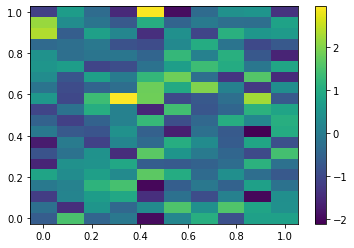

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_of_x   = 10
num_of_y   = 20
x          = np.linspace(0,1,num_of_x)
y          = np.linspace(0,1,num_of_y)
z          = np.random.randn(num_of_y,num_of_x)
plt.pcolormesh(x,y,z)
cbar = plt.colorbar()



# Now we are going to work with NetCDF files

In [9]:
#conda install netcdf4
import netCDF4 as nc
import os

In [25]:
Path_to_Files = 'C:/Users/u0142106/Desktop/SpaceWeatherSummerSchool/swsss2023/Data_Day2/'
All_Files     = os.listdir(Path_to_Files)
print(All_Files[19])
Dataset       =nc.Dataset(Path_to_Files+All_Files[19])

wfs.t06z.ipe05.20230724_060000.nc


In [26]:
print(Dataset.variables)

{'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(x01)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (90,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(x02)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (91,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'alt': <class 'netCDF4._netCDF4.Variable'>
float32 alt(x03)
    long_name: altitude
    units: km
unlimited dimensions: 
current shape = (109,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'tec': <class 'netCDF4._netCDF4.Variable'>
float32 tec(x02, x01)
    long_name: tec
    units: TECu
unlimited dimensions: 
current shape = (91, 90)
filling on, default _FillValue of 9.969209968386869e+36 used, 'NmF2': <class 'netCDF4._netCDF4.Variable'>
float32 NmF2(x02, x01)
    long_name: NmF2
    units: m-3
unlimited dimensions: 
current shape = (91, 90)
f

<ipython-input-26-99ddddfe9296>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(Dataset.variables)


In [33]:
for variables in Dataset.variables:
    print(variables)
Tec_content = Dataset['tec'][:]

print(np.shape(Tec_content))
print(Dataset['tec'].units)

lon
lat
alt
tec
NmF2
HmF2
(91, 90)
TECu


<ipython-input-33-5ef6d8924eb3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Tec_content = Dataset['tec'][:]
<ipython-input-33-5ef6d8924eb3>:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(Dataset['tec'].units)


In [34]:
def plot_tec(dataset , figsize=(12,6)):
    fig,ax = plt.figure(figsize= figsize)
    ax.pcolormesh()
    return fig,ax